# EE219 Project 1

# Classification Analysis on Textual Data

### Import Packages

In [2]:
import re
import math
import matplotlib.pyplot as plt
import numpy as np
import nltk
import operator
import itertools
import string
from sklearn.pipeline import Pipeline
from sklearn import metrics
from collections import defaultdict, Counter
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.snowball import SnowballStemmer
from pickle import dump
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction import text
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, confusion_matrix, recall_score, roc_curve, precision_score, accuracy_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.preprocessing import MinMaxScaler
from string import punctuation
from sklearn.svm import LinearSVC
from sklearn import metrics, svm, cross_validation

### Fetch Data

In [3]:
# data of each category
ct_graphics = ['comp.graphics']
ct_misc = ['comp.os.ms-windows.misc']
ct_pc = ['comp.sys.ibm.pc.hardware']
ct_mac = ['comp.sys.mac.hardware']
ct_graphics_train = fetch_20newsgroups(subset = 'train', categories = ct_graphics, shuffle = True, random_state = 42)
ct_misc_train = fetch_20newsgroups(subset = 'train', categories = ct_misc, shuffle = True, random_state = 42)
ct_pc_train = fetch_20newsgroups(subset = 'train', categories = ct_pc, shuffle = True, random_state = 42)
ct_mac_train = fetch_20newsgroups(subset = 'train', categories = ct_mac, shuffle = True, random_state = 42)


ra_autos = ['rec.autos']
ra_motorcycle = ['rec.motorcycles']
ra_baseball = ['rec.sport.baseball']
ra_hockey = ['rec.sport.hockey']
ra_autos_train = fetch_20newsgroups(subset = 'train', categories = ra_autos, shuffle = True, random_state = 42)
ra_motorcycle_train = fetch_20newsgroups(subset = 'train', categories = ra_motorcycle, shuffle = True, random_state = 42)
ra_baseball_train = fetch_20newsgroups(subset = 'train', categories = ra_baseball, shuffle = True, random_state = 42)
ra_hockey_train = fetch_20newsgroups(subset = 'train', categories = ra_hockey, shuffle = True, random_state = 42)


# data of eight categories
all_categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 
                  'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
all_train = fetch_20newsgroups(subset = 'train', categories = all_categories, shuffle = True, random_state = 42)
all_test = fetch_20newsgroups(subset = 'test', categories = all_categories, shuffle = True, random_state = 42)

# data of twenty categories
twenty_train = fetch_20newsgroups(subset = 'train', shuffle=True, random_state=42)
total_categories = twenty_train.target_names

## Problem (a)

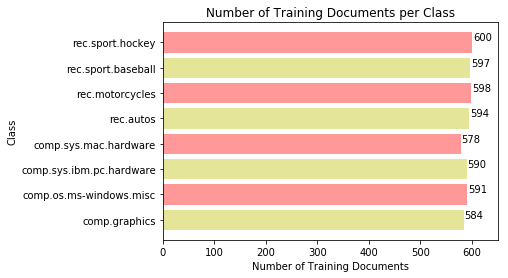

In [3]:
index = np.arange(8)
number = (len(ct_graphics_train.data), len(ct_misc_train.data), len(ct_pc_train.data), 
          len(ct_mac_train.data), len(ra_autos_train.data), 
          len(ra_motorcycle_train.data), len(ra_baseball_train.data), len(ra_hockey_train.data))

plt.ylabel('Class')
plt.xlabel('Number of Training Documents')
plt.title('Number of Training Documents per Class')
plt.yticks(index, ('comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware','comp.sys.mac.hardware', 
                   'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'))
color = ['y','r','y','r','y','r','y','r']

bars = plt.barh(index, number, height = 0.8, alpha = 0.4, color = color)

for (a,b) in zip(number, index):
    plt.text(a+20, b, '%.0f' % a, ha = 'center', va = 'bottom', fontsize = 10)

plt.xlim(0,650)
plt.legend = ()
plt.show()

## Problem (b)

In [4]:
stop_words = text.ENGLISH_STOP_WORDS

def stem_tokenizer(text):
    stemmer = SnowballStemmer("english")
    text_new = re.sub('[^a-zA-Z]',' ',text)
    text_new = text_new.lower()
    words = text_new.split()
    stemmed = [stemmer.stem(item) for item in words]
    words_new = []
    for word in stemmed:
        if re.search('[a-z]{2,}',word):
            words_new.append(word)
    return words_new

In [5]:

vect_2 = CountVectorizer(analyzer = 'word', tokenizer = stem_tokenizer, stop_words = stop_words, min_df = 2)
counts_train_2 = vect_2.fit_transform(all_train.data)
counts_test_2 = vect_2.fit_transform(all_test.data)
tfidf_transformer = TfidfTransformer()
train_tfidf_2 = tfidf_transformer.fit_transform(counts_train_2)
test_tfidf_2 = tfidf_transformer.fit_transform(counts_test_2)

print("Dimensions of TF-IDF Vector of the trainning data with min_df=2:",train_tfidf_2.shape)
print('Number of Terms Extracted with min_df=2:',train_tfidf_2.shape[1])
print("Dimensions of TF-IDF Vector of the testing data with min_df=2:",test_tfidf_2.shape)
print('Number of Terms Extracted with min_df=2:',test_tfidf_2.shape[1])

vect_5 = CountVectorizer(analyzer = 'word', tokenizer = stem_tokenizer, stop_words = stop_words, min_df = 5)
counts_train_5 = vect_5.fit_transform(all_train.data)
counts_test_5 = vect_5.fit_transform(all_test.data)
tfidf_transformer = TfidfTransformer()
train_tfidf_5 = tfidf_transformer.fit_transform(counts_train_5)
test_tfidf_5 = tfidf_transformer.fit_transform(counts_test_5)
print("Dimensions of TF-IDF Vector of the trainning data with min_df=5:",train_tfidf_5.shape)
print('Number of Terms Extracted with min_df=5:',train_tfidf_5.shape[1])
print("Dimensions of TF-IDF Vector of the testing data with min_df=5:",test_tfidf_5.shape)
print('Number of Terms Extracted with min_df=5:',test_tfidf_5.shape[1])

Dimensions of TF-IDF Vector of the trainning data with min_df=2: (4732, 19385)
Number of Terms Extracted with min_df=2: 19385
Dimensions of TF-IDF Vector of the testing data with min_df=2: (3150, 13813)
Number of Terms Extracted with min_df=2: 13813
Dimensions of TF-IDF Vector of the trainning data with min_df=5: (4732, 8976)
Number of Terms Extracted with min_df=5: 8976
Dimensions of TF-IDF Vector of the testing data with min_df=5: (3150, 6695)
Number of Terms Extracted with min_df=5: 6695


## Problem (c) 

In [6]:
index_pc = total_categories.index('comp.sys.ibm.pc.hardware')
index_mac = total_categories.index('comp.sys.mac.hardware')
index_forsale = total_categories.index('misc.forsale')
index_religion = total_categories.index('soc.religion.christian')
class_indices = [index_pc, index_mac, index_forsale, index_religion]

all_data = []
all_words = []
all_word_freq = []
words_class_dict = defaultdict(list)

for category in total_categories:
    newsgroup_category = fetch_20newsgroups(subset = 'train', categories = [category], 
                                            shuffle = True, random_state = 42)
    temp = ''
    for file in newsgroup_category.data:
        temp += ' '+file
    all_data.append(temp)

In [7]:
for class_data,index in zip(all_data,range(len(all_data))):
    tokenize_data = stem_tokenizer(class_data)
    unique_words = set(tokenize_data)    
    all_words.append(list(unique_words))
    word_count = Counter(tokenize_data)
    all_word_freq.append(word_count)
    for word in unique_words:
        words_class_dict[word].append(total_categories[index])

In [8]:
for class_index in class_indices:
    terms = all_words[class_index]
    freq = all_word_freq[class_index]
    terms_number = len(terms)
    max_freq = max(freq.values())
    tficf = dict()
    for each_term in range(terms_number):
        term = terms[each_term]
        frequency = freq.get(term)
        class_number = len(words_class_dict[term])
        tficf[term] = (0.5 + (0.5 * frequency/max_freq)) * math.log(len(total_categories)/class_number)
    print('Most Significant 10 Terms for',total_categories[class_index])
    most_significant_terms = dict(sorted(tficf.items(), key = operator.itemgetter(1), reverse = True) [:10])
    print(list(most_significant_terms.keys()),'\n')

Most Significant 10 Terms for comp.sys.ibm.pc.hardware
['aspi', 'balog', 'penev', 'scsiha', 'husak', 'usma', 'fasst', 'schaufenbuel', 'buslog', 'korenek'] 

Most Significant 10 Terms for comp.sys.mac.hardware
['powerbook', 'lciii', 'adb', 'bmug', 'iivx', 'iifx', 'jartsu', 'firstclass', 'macus', 'nodin'] 

Most Significant 10 Terms for misc.forsale
['sabretooth', 'liefeld', 'hobgoblin', 'uccxkvb', 'radley', 'kou', 'snes', 'keown', 'koutd', 'spiderman'] 

Most Significant 10 Terms for soc.religion.christian
['clh', 'liturgi', 'kulikauska', 'mmalt', 'caralv', 'monophysit', 'mussack', 'sspx', 'atterlep', 'schismat'] 



## Problem (d)

In [9]:
from sklearn.decomposition import TruncatedSVD, NMF

# NMF & LSI dimension reduction at min_df=2
print('WHEN min_df = 2')
print('-'*20)
LSI = TruncatedSVD(n_components = 50, random_state = 42)
NMF = NMF(n_components = 50, init = 'random', random_state = 0)

train_LSI_2 = LSI.fit_transform(train_tfidf_2)
train_NMF_2 = NMF.fit_transform(train_tfidf_2)
print('Dimensions of TFxIDF Vector of training data using LSI:',train_LSI_2.shape)
print('Dimensions of TFxIDF Vector of training data using NMF:',train_NMF_2.shape,'\n')


test_LSI_2 = LSI.fit_transform(test_tfidf_2)
test_NMF_2 = NMF.fit_transform(test_tfidf_2)
print('Dimensions of TFxIDF Vector of testing data using LSI:',test_LSI_2.shape)
print('Dimensions of TFxIDF Vector of testing data using NMF:',test_NMF_2.shape)
print('-'*20)

WHEN min_df = 2
--------------------
Dimensions of TFxIDF Vector of training data using LSI: (4732, 50)
Dimensions of TFxIDF Vector of training data using NMF: (4732, 50) 

Dimensions of TFxIDF Vector of testing data using LSI: (3150, 50)
Dimensions of TFxIDF Vector of testing data using NMF: (3150, 50)
--------------------


In [10]:
# LSI dimension reduction at min_df=5
print('WHEN min_df = 5')
print('-'*20)

train_LSI_5 = LSI.fit_transform(train_tfidf_5)
train_NMF_5 = NMF.fit_transform(train_tfidf_5)
print('Dimensions of TFxIDF Vector of training data using LSI:',train_LSI_5.shape)
print('Dimensions of TFxIDF Vector of training data using NMF:',train_NMF_5.shape,'\n')

test_LSI_5 = LSI.fit_transform(test_tfidf_5)
test_NMF_5 = NMF.fit_transform(test_tfidf_5)
print('Dimensions of TFxIDF Vector of testing data using LSI:',test_LSI_5.shape)
print('Dimensions of TFxIDF Vector of testing data using NMF:',test_NMF_5.shape)
print('-'*20)

WHEN min_df = 5
--------------------
Dimensions of TFxIDF Vector of training data using LSI: (4732, 50)
Dimensions of TFxIDF Vector of training data using NMF: (4732, 50) 

Dimensions of TFxIDF Vector of testing data using LSI: (3150, 50)
Dimensions of TFxIDF Vector of testing data using NMF: (3150, 50)
--------------------


## Problem(e)

In [11]:
categories_C = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
categories_R = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

def classifier(targets):
    classifier = targets.copy()
    for i in range(0,len(classifier)):
        if classifier[i] in range(0,4):
            classifier[i] = 0
        else:
            classifier[i] = 1
    return(classifier)

train_classifier = classifier(all_train.target)
test_classifier = classifier(all_test.target)

bclasses = ['Computer technology', 'Recreational activity']

In [12]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)
    
    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.set_title('ROC Curve for Linear SVM Model')

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

In [13]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without Normalization')
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '%.2f' % cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j]>thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
def compute_and_plot_confusion_matrix(test_label, test_predicted):
    cnf_matrix = confusion_matrix(test_label, test_predicted)
    np.set_printoptions(precision = 2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes = bclasses, title = 'Confusion Matrix without Normalization')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes = bclasses, normalize = True, title = 'Normalized Confusion Matrix')
    plt.show()

In [15]:
from sklearn.decomposition import TruncatedSVD, NMF
def produce_pipeline(MIN_DF, LSI_OR_NMF, CLF):
    if LSI_OR_NMF == LSI:
        pipe = Pipeline([('vect', CountVectorizer(analyzer = 'word', tokenizer = stem_tokenizer, stop_words = stop_words, min_df = MIN_DF)),
                         ('tfidf', TfidfTransformer()),
                         ('reduce_dim', TruncatedSVD(n_components = 50, random_state = 42)),
                         ('clf', CLF)])
    elif LSI_OR_NMF == NMF:
        pipe = Pipeline([('vect', CountVectorizer(analyzer = 'word', tokenizer = stem_tokenizer, stop_words = stop_words, min_df = MIN_DF)),
                         ('tfidf', TfidfTransformer()),
                         ('reduce_dim', NMF(n_components = 50, init = 'random', random_state = 0)),
                         ('clf', CLF)])
    return pipe

### hard margin SVC

------------------------------
RESULTS WHEN LSI & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[1472   88]
 [  15 1575]]
Normalized Confusion Matrix
[[ 0.94  0.06]
 [ 0.01  0.99]]


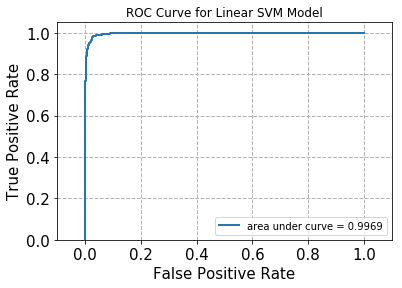

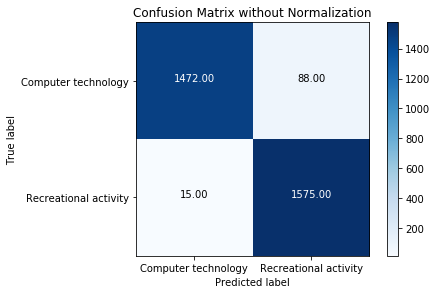

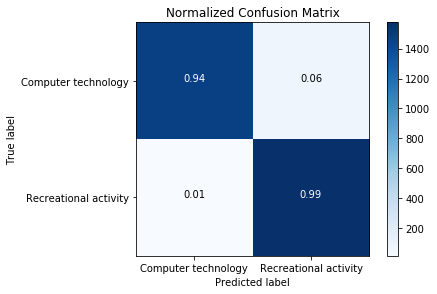

Accuracy: 0.967301587302
Recall: 0.990566037736
Precision: 0.947083583885
F1_score: 0.968336919766 


------------------------------
RESULTS WHEN LSI & min_df = 5
------------------------------
Confusion Matrix without Normalization
[[1559    1]
 [ 465 1125]]
Normalized Confusion Matrix
[[  9.99e-01   6.41e-04]
 [  2.92e-01   7.08e-01]]


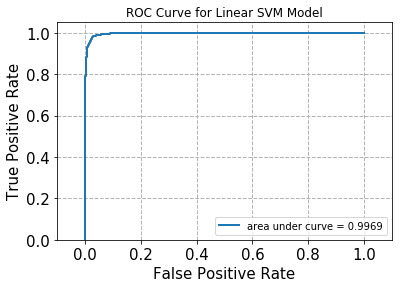

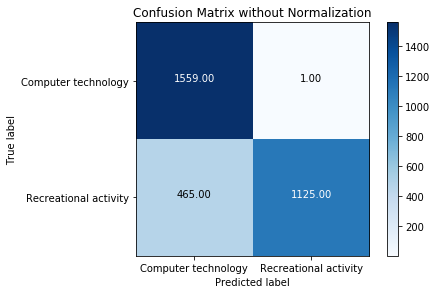

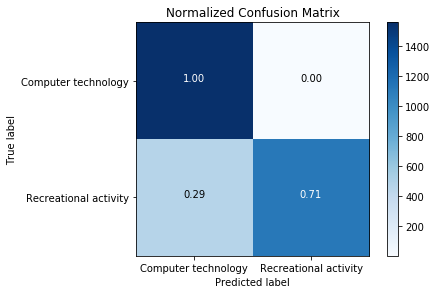

Accuracy: 0.852063492063
Recall: 0.707547169811
Precision: 0.999111900533
F1_score: 0.828424153166 


------------------------------
RESULTS WHEN NMF & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[1383  177]
 [  10 1580]]
Normalized Confusion Matrix
[[ 0.89  0.11]
 [ 0.01  0.99]]


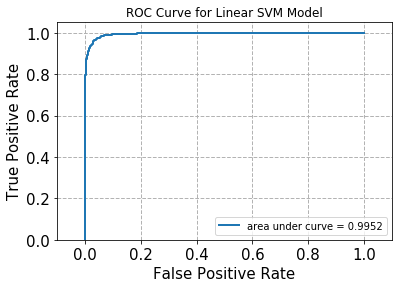

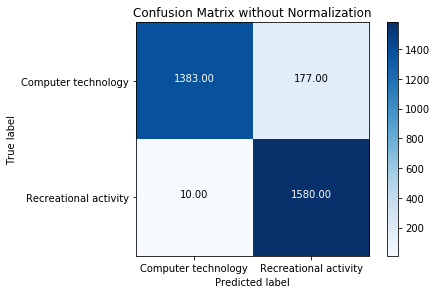

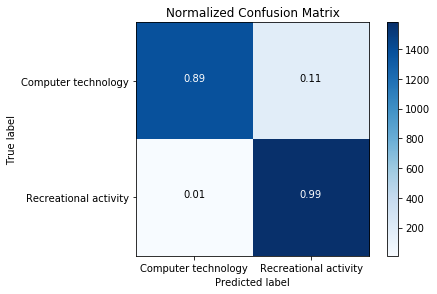

Accuracy: 0.940634920635
Recall: 0.993710691824
Precision: 0.899260102447
F1_score: 0.94412907081 




In [16]:
i = 0
for i in range(0,3):
    if i == 0:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = LSI
    elif i == 1:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 5')
        print('-'*30)
        MIN_DF = 5
        LSI_OR_NMF = LSI
    else:
        print('-'*30)
        print('RESULTS WHEN NMF & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = NMF
    pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, LinearSVC(C = 1000))
    pipe.fit(all_train.data, train_classifier)
    
    test_score = pipe.decision_function(all_test.data)
    test_predict = pipe.predict(all_test.data)
    
    fpr, tpr, threshold = roc_curve(test_classifier, test_score)
    plot_roc(fpr, tpr)
    
    compute_and_plot_confusion_matrix(test_classifier, test_predict)
    
    accuracy = accuracy_score(test_classifier, test_predict)
    print('Accuracy:',accuracy)
    
    recall = recall_score(test_classifier, test_predict)
    print('Recall:',recall)
    
    precision = precision_score(test_classifier, test_predict)
    print('Precision:',precision)
    
    f1_score = 2/((1/recall)+(1/precision))
    print('F1_score:',f1_score,'\n\n')
    
    i = i+1


### soft margin SVC

------------------------------
RESULTS WHEN LSI & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[1374  186]
 [   9 1581]]
Normalized Confusion Matrix
[[ 0.88  0.12]
 [ 0.01  0.99]]


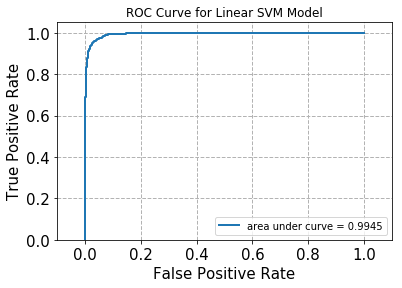

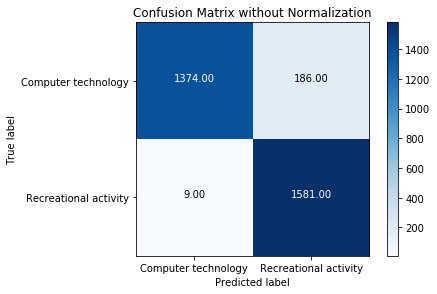

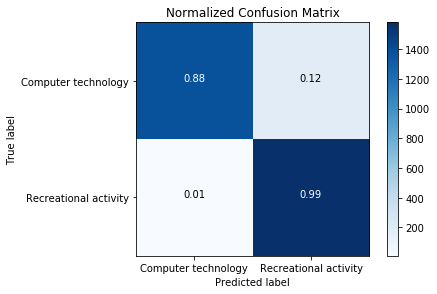

Accuracy: 0.938095238095
Recall: 0.994339622642
Precision: 0.894736842105
F1_score: 0.941912421805 


------------------------------
RESULTS WHEN LSI & min_df = 5
------------------------------
Confusion Matrix without Normalization
[[1382  178]
 [  10 1580]]
Normalized Confusion Matrix
[[ 0.89  0.11]
 [ 0.01  0.99]]


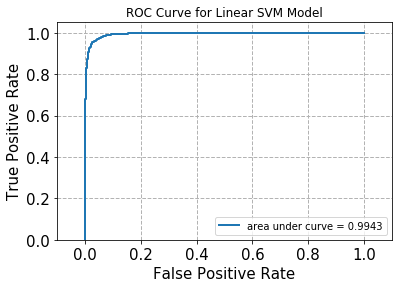

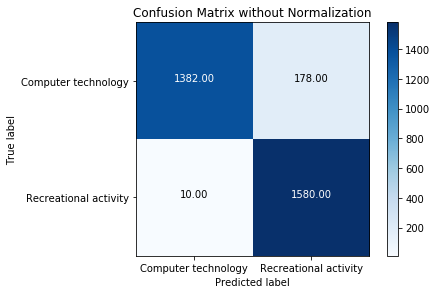

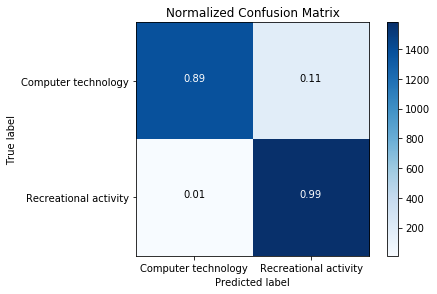

Accuracy: 0.940317460317
Recall: 0.993710691824
Precision: 0.898748577929
F1_score: 0.943847072879 


------------------------------
RESULTS WHEN NMF & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[  19 1541]
 [   0 1590]]
Normalized Confusion Matrix
[[ 0.01  0.99]
 [ 0.    1.  ]]


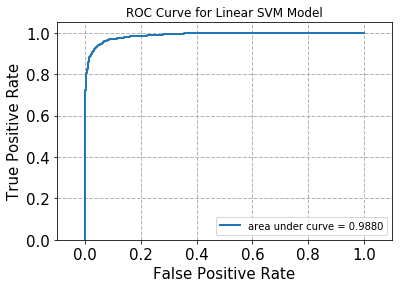

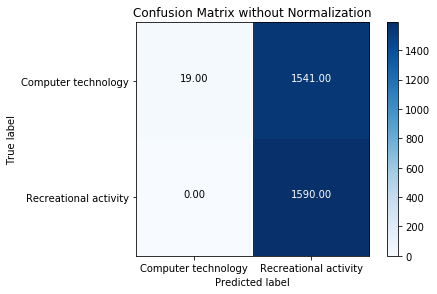

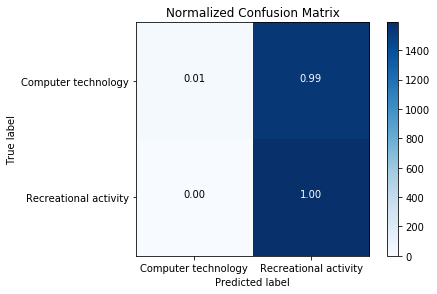

Accuracy: 0.510793650794
Recall: 1.0
Precision: 0.507824976046
F1_score: 0.673586104639 




In [17]:
i = 0
for i in range(0,3):
    if i == 0:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = LSI
    elif i == 1:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 5')
        print('-'*30)
        MIN_DF = 5
        LSI_OR_NMF = LSI
    else:
        print('-'*30)
        print('RESULTS WHEN NMF & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = NMF
    pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, LinearSVC(C = 0.001))
    pipe.fit(all_train.data, train_classifier)
    
    test_score = pipe.decision_function(all_test.data)
    test_predict = pipe.predict(all_test.data)
    
    fpr, tpr, threshold = roc_curve(test_classifier, test_score)
    plot_roc(fpr, tpr)
    
    compute_and_plot_confusion_matrix(test_classifier, test_predict)
    
    accuracy = accuracy_score(test_classifier, test_predict)
    print('Accuracy:',accuracy)
    
    recall = recall_score(test_classifier, test_predict)
    print('Recall:',recall)
    
    precision = precision_score(test_classifier, test_predict)
    print('Precision:',precision)
    
    f1_score = 2/((1/recall)+(1/precision))
    print('F1_score:',f1_score,'\n\n')
    
    i = i+1


## Problem (f) 

------------------------------
RESULTS WHEN LSI & min_df = 2
------------------------------
100
Confusion Matrix without Normalization
[[1512   48]
 [  28 1562]]
Normalized Confusion Matrix
[[ 0.97  0.03]
 [ 0.02  0.98]]


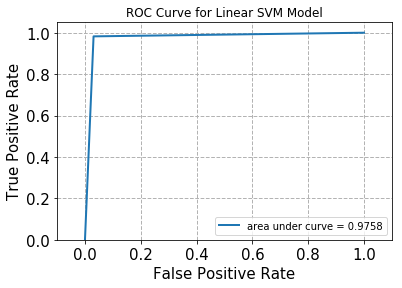

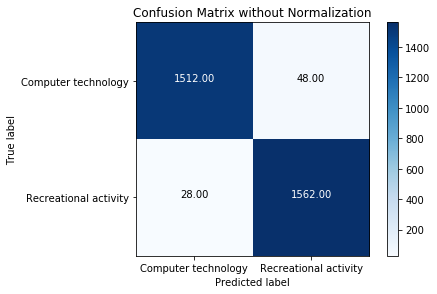

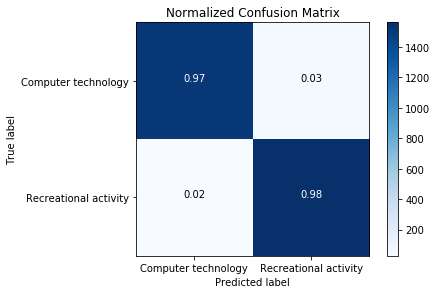

Accuracy: 0.975873015873
Recall: 0.982389937107
Precision: 0.970186335404
F1_score: 0.97625 


------------------------------
RESULTS WHEN LSI & min_df = 5
------------------------------
100
Confusion Matrix without Normalization
[[1510   50]
 [  29 1561]]
Normalized Confusion Matrix
[[ 0.97  0.03]
 [ 0.02  0.98]]


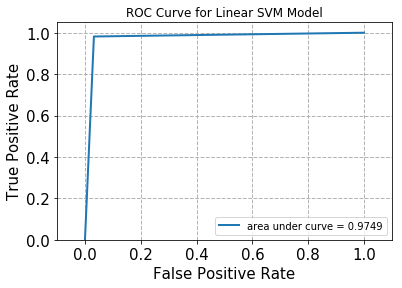

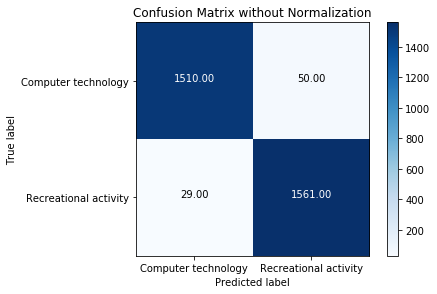

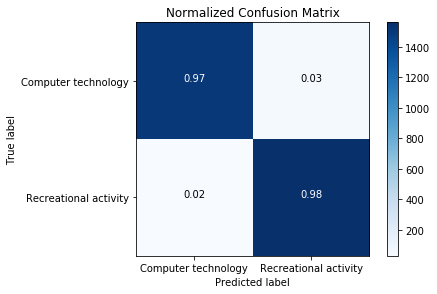

Accuracy: 0.974920634921
Recall: 0.981761006289
Precision: 0.968963376785
F1_score: 0.975320212434 


------------------------------
RESULTS WHEN NMF & min_df = 2
------------------------------
100
Confusion Matrix without Normalization
[[1489   71]
 [  51 1539]]
Normalized Confusion Matrix
[[ 0.95  0.05]
 [ 0.03  0.97]]


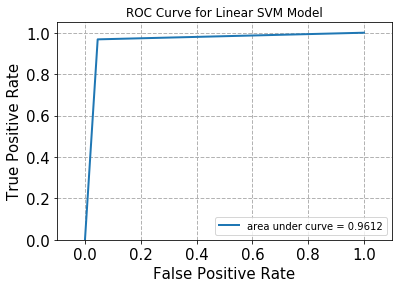

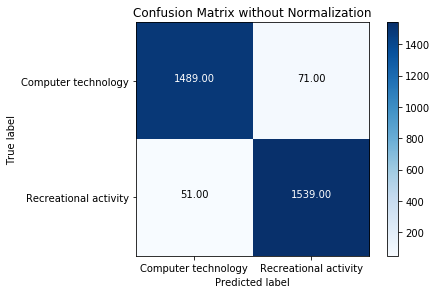

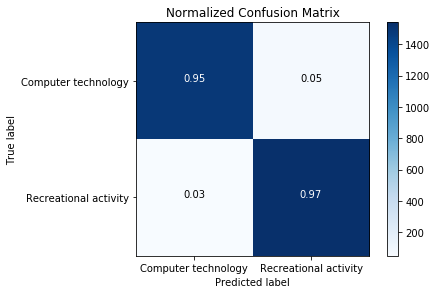

Accuracy: 0.96126984127
Recall: 0.967924528302
Precision: 0.955900621118
F1_score: 0.961875 




In [19]:
i = 0
for i in range(0,3):
    if i == 0:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = LSI
    elif i == 1:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 5')
        print('-'*30)
        MIN_DF = 5
        LSI_OR_NMF = LSI
    else:
        print('-'*30)
        print('RESULTS WHEN NMF & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = NMF
    
    accuracies = []
    gamma_values = [10 ** j for j in range(-3,4)]
    
    for value in gamma_values:
        pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, LinearSVC(C = value))
        pipe.fit(all_train.data, train_classifier)
        scores = cross_validation.cross_val_score(pipe, np.concatenate((all_train.data, all_test.data), axis=0),
                                                  np.append(train_classifier, test_classifier), cv=5, scoring='accuracy')
        accuracies.append(np.average(scores))
        
    best_gamma_value = gamma_values[accuracies.index(max(accuracies))]
    print(best_gamma_value)
    
    pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, LinearSVC(C = best_gamma_value))
    pipe.fit(all_train.data, train_classifier)
    
    test_predict = pipe.predict(all_test.data)
    
    fpr, tpr, threshold = roc_curve(test_classifier, test_predict)
    plot_roc(fpr, tpr)
    
    compute_and_plot_confusion_matrix(test_classifier, test_predict)
    
    accuracy = accuracy_score(test_classifier, test_predict)
    print('Accuracy:',accuracy)
    
    recall = recall_score(test_classifier, test_predict)
    print('Recall:',recall)
    
    precision = precision_score(test_classifier, test_predict)
    print('Precision:',precision)
    
    f1_score = 2/((1/recall)+(1/precision))
    print('F1_score:',f1_score,'\n\n')
    
    i = i+1

## Problem (g)

### MultinomialNB()

------------------------------
RESULTS WHEN min_df = 2
------------------------------
Confusion Matrix without Normalization
[[1520   40]
 [  17 1573]]
Normalized Confusion Matrix
[[ 0.97  0.03]
 [ 0.01  0.99]]


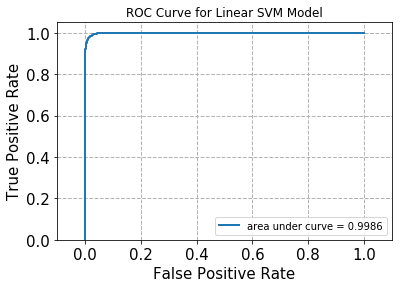

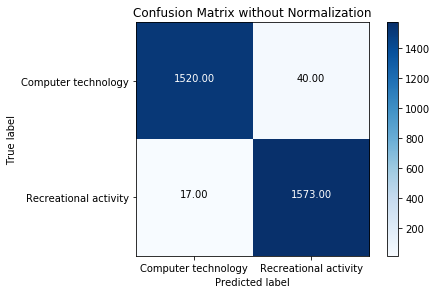

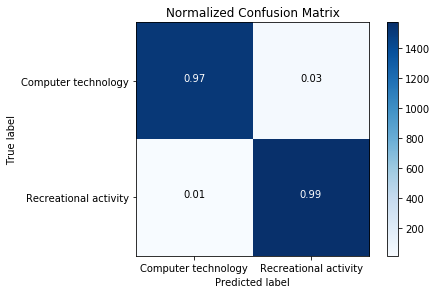

Accuracy: 0.981904761905
Recall: 0.989308176101
Precision: 0.975201487911
F1_score: 0.982204183578 


------------------------------
RESULTS WHEN min_df = 5
------------------------------
Confusion Matrix without Normalization
[[1530   30]
 [  30 1560]]
Normalized Confusion Matrix
[[ 0.98  0.02]
 [ 0.02  0.98]]


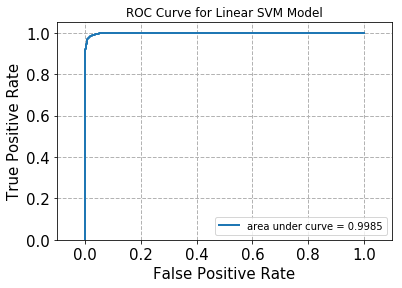

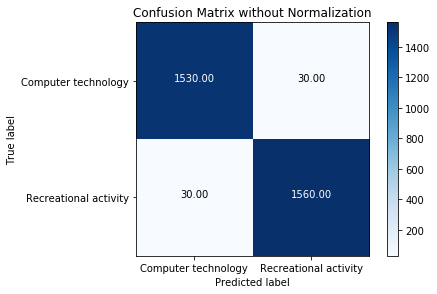

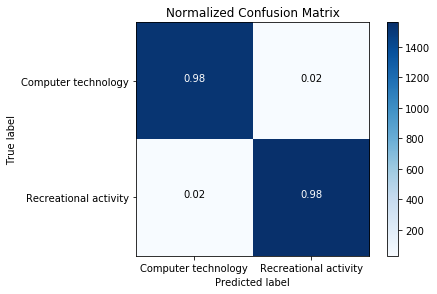

Accuracy: 0.980952380952
Recall: 0.981132075472
Precision: 0.981132075472
F1_score: 0.981132075472 




In [20]:
i = 0
for i in range(0,2):
    if i == 0:
        print('-'*30)
        print('RESULTS WHEN min_df = 2')
        print('-'*30)
        pipe = Pipeline([('vect', CountVectorizer(analyzer = 'word', tokenizer = stem_tokenizer, stop_words = stop_words, min_df = 2)),
                         ('tfidf', TfidfTransformer()),
                         ('clf', MultinomialNB())])
    elif i == 1:
        print('-'*30)
        print('RESULTS WHEN min_df = 5')
        print('-'*30)
        pipe = Pipeline([('vect', CountVectorizer(analyzer = 'word', tokenizer = stem_tokenizer, stop_words = stop_words, min_df = 5)),
                         ('tfidf', TfidfTransformer()),
                         ('clf', MultinomialNB())])
    pipe.fit(all_train.data, train_classifier)
    
    test_score = pipe.predict_proba(all_test.data)
    test_predict = pipe.predict(all_test.data)
    
    fpr, tpr, threshold = roc_curve(test_classifier, test_score[:,1])
    plot_roc(fpr, tpr)
    
    compute_and_plot_confusion_matrix(test_classifier, test_predict)
    
    accuracy = accuracy_score(test_classifier, test_predict)
    print('Accuracy:',accuracy)
    
    recall = recall_score(test_classifier, test_predict)
    print('Recall:',recall)
    
    precision = precision_score(test_classifier, test_predict)
    print('Precision:',precision)
    
    f1_score = 2/((1/recall)+(1/precision))
    print('F1_score:',f1_score,'\n\n')
    
    i = i+1


### GaussianNB()

------------------------------
RESULTS WHEN LSI & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[1349  211]
 [  86 1504]]
Normalized Confusion Matrix
[[ 0.86  0.14]
 [ 0.05  0.95]]


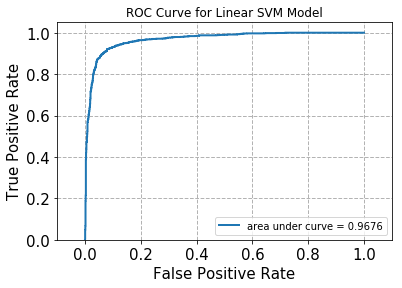

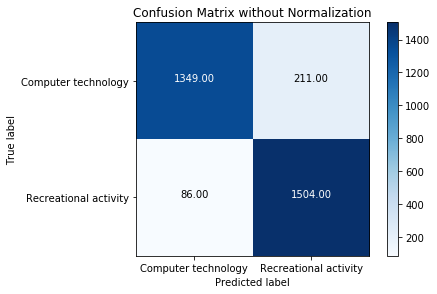

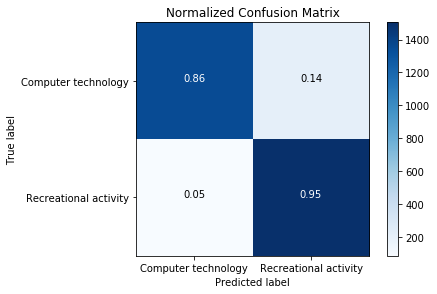

Accuracy: 0.905714285714
Recall: 0.945911949686
Precision: 0.876967930029
F1_score: 0.910136157337 


------------------------------
RESULTS WHEN LSI & min_df = 5
------------------------------
Confusion Matrix without Normalization
[[1228  332]
 [  58 1532]]
Normalized Confusion Matrix
[[ 0.79  0.21]
 [ 0.04  0.96]]


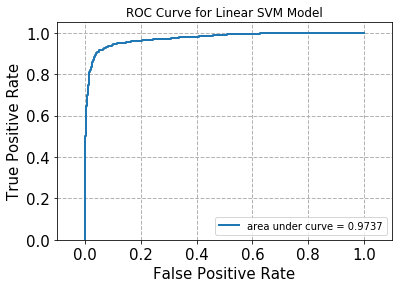

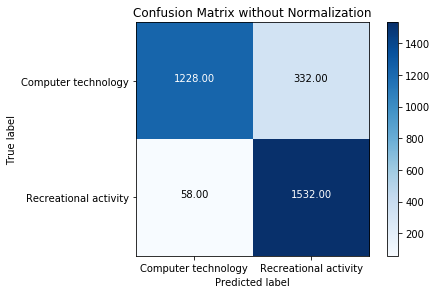

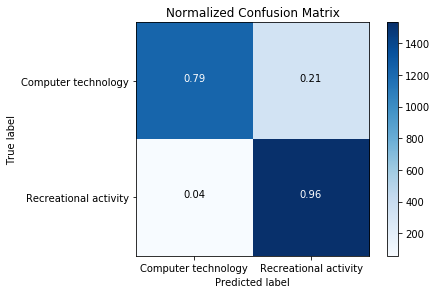

Accuracy: 0.87619047619
Recall: 0.963522012579
Precision: 0.821888412017
F1_score: 0.887087434858 


------------------------------
RESULTS WHEN NMF & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[1418  142]
 [  63 1527]]
Normalized Confusion Matrix
[[ 0.91  0.09]
 [ 0.04  0.96]]


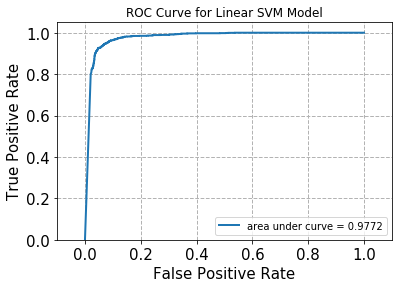

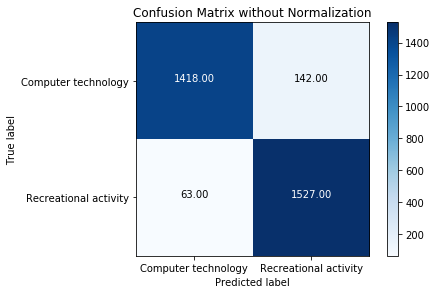

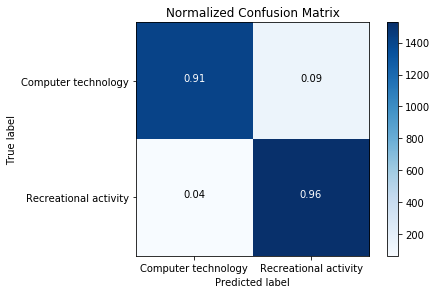

Accuracy: 0.934920634921
Recall: 0.960377358491
Precision: 0.914919113241
F1_score: 0.937097269101 




In [21]:
i = 0
for i in range(0,3):
    if i == 0:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = LSI
    elif i == 1:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 5')
        print('-'*30)
        MIN_DF = 5
        LSI_OR_NMF = LSI
    else:
        print('-'*30)
        print('RESULTS WHEN NMF & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = NMF
    pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, GaussianNB())
    pipe.fit(all_train.data, train_classifier)
    
    test_score = pipe.predict_proba(all_test.data)
    test_predict = pipe.predict(all_test.data)
    
    fpr, tpr, threshold = roc_curve(test_classifier, test_score[:,1])
    plot_roc(fpr, tpr)
    
    compute_and_plot_confusion_matrix(test_classifier, test_predict)
    
    accuracy = accuracy_score(test_classifier, test_predict)
    print('Accuracy:',accuracy)
    
    recall = recall_score(test_classifier, test_predict)
    print('Recall:',recall)
    
    precision = precision_score(test_classifier, test_predict)
    print('Precision:',precision)
    
    f1_score = 2/((1/recall)+(1/precision))
    print('F1_score:',f1_score,'\n\n')
    
    i = i+1


## Problem (h) 

------------------------------
RESULTS WHEN LSI & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[1491   69]
 [  35 1555]]
Normalized Confusion Matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


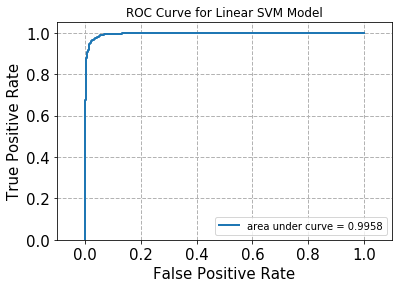

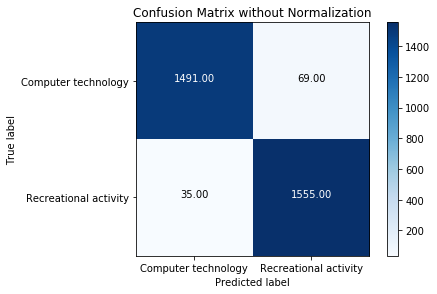

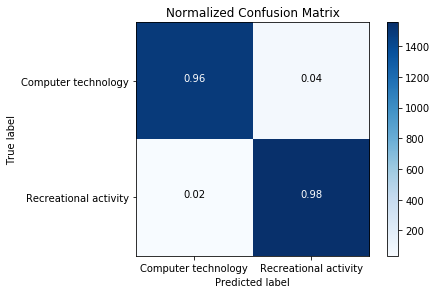

Accuracy: 0.966984126984
Recall: 0.977987421384
Precision: 0.957512315271
F1_score: 0.967641568139 


------------------------------
RESULTS WHEN LSI & min_df = 5
------------------------------
Confusion Matrix without Normalization
[[1494   66]
 [  33 1557]]
Normalized Confusion Matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


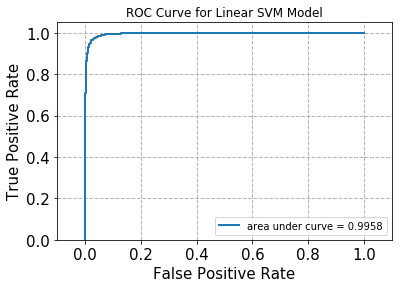

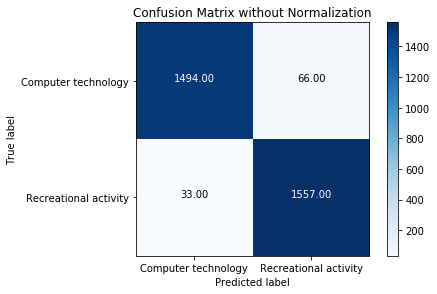

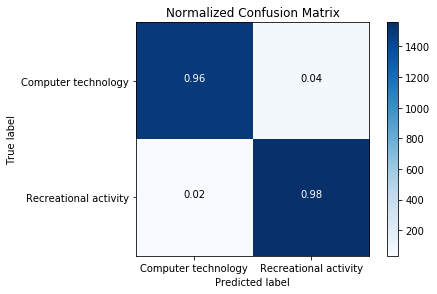

Accuracy: 0.968571428571
Recall: 0.979245283019
Precision: 0.959334565619
F1_score: 0.96918767507 


------------------------------
RESULTS WHEN NMF & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[1486   74]
 [  75 1515]]
Normalized Confusion Matrix
[[ 0.95  0.05]
 [ 0.05  0.95]]


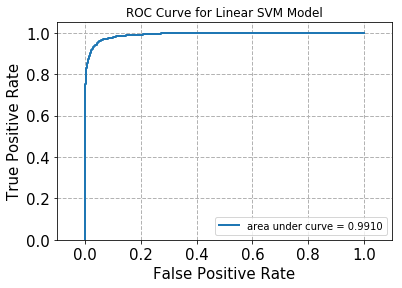

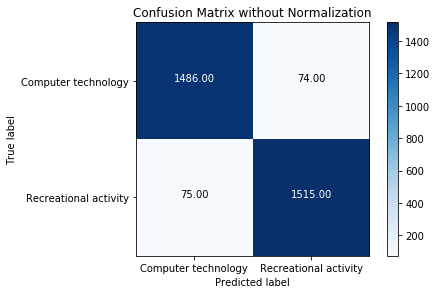

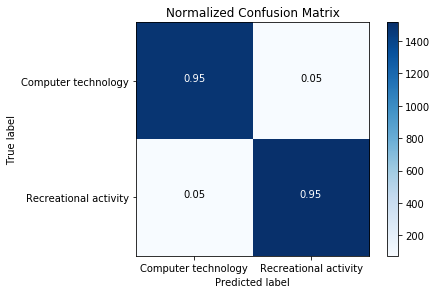

Accuracy: 0.952698412698
Recall: 0.952830188679
Precision: 0.953429830082
F1_score: 0.953129915068 




In [22]:
i = 0
for i in range(0,3):
    if i == 0:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = LSI
    elif i == 1:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 5')
        print('-'*30)
        MIN_DF = 5
        LSI_OR_NMF = LSI
    else:
        print('-'*30)
        print('RESULTS WHEN NMF & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = NMF
    pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, LogisticRegression())
    pipe.fit(all_train.data, train_classifier)
    
    test_score = pipe.decision_function(all_test.data)
    test_predict = pipe.predict(all_test.data)
    
    fpr, tpr, threshold = roc_curve(test_classifier, test_score)
    plot_roc(fpr, tpr)
    
    compute_and_plot_confusion_matrix(test_classifier, test_predict)
    
    accuracy = accuracy_score(test_classifier, test_predict)
    print('Accuracy:',accuracy)
    
    recall = recall_score(test_classifier, test_predict)
    print('Recall:',recall)
    
    precision = precision_score(test_classifier, test_predict)
    print('Precision:',precision)
    
    f1_score = 2/((1/recall)+(1/precision))
    print('F1_score:',f1_score,'\n\n')
    
    i = i+1
    

## Problem (i)

### l-1 norm Logistic Regression 

In [23]:
coefficients = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

------------------------------
RESULTS WHEN LSI & min_df = 2
------------------------------
Best Regulation Parameter: 100
Confusion Matrix without Normalization
[[1513   47]
 [  27 1563]]
Normalized Confusion Matrix
[[ 0.97  0.03]
 [ 0.02  0.98]]


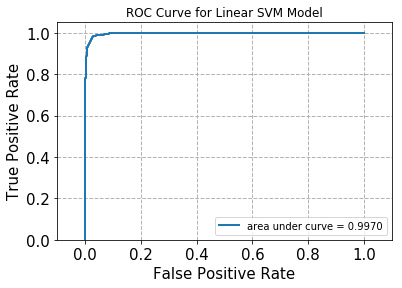

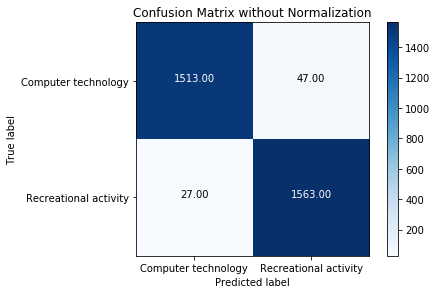

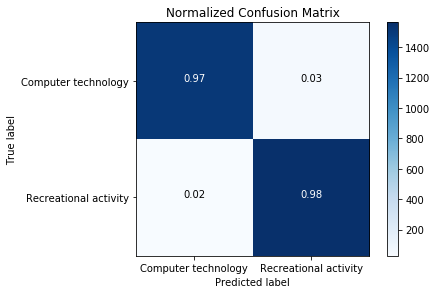

Accuracy: 0.976507936508
Recall: 0.983018867925
Precision: 0.970807453416
F1_score: 0.976875 


------------------------------
RESULTS WHEN LSI & min_df = 5
------------------------------
Best Regulation Parameter: 10
Confusion Matrix without Normalization
[[1509   51]
 [  27 1563]]
Normalized Confusion Matrix
[[ 0.97  0.03]
 [ 0.02  0.98]]


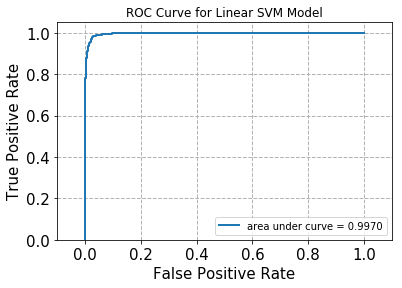

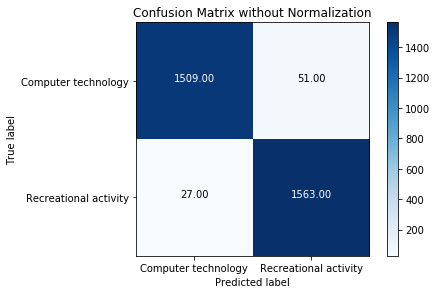

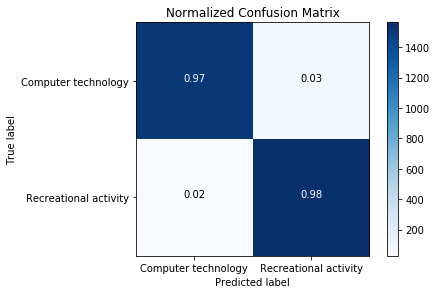

Accuracy: 0.975238095238
Recall: 0.983018867925
Precision: 0.968401486989
F1_score: 0.975655430712 


------------------------------
RESULTS WHEN NMF & min_df = 2
------------------------------
Best Regulation Parameter: 100
Confusion Matrix without Normalization
[[1496   64]
 [  46 1544]]
Normalized Confusion Matrix
[[ 0.96  0.04]
 [ 0.03  0.97]]


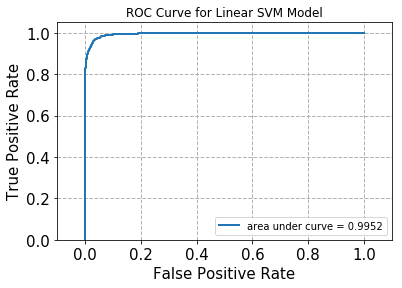

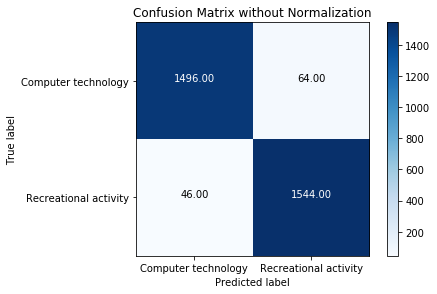

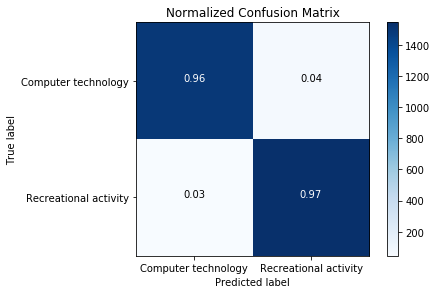

Accuracy: 0.965079365079
Recall: 0.97106918239
Precision: 0.960199004975
F1_score: 0.965603502189 




In [24]:
i = 0
for i in range(0,3):
    if i == 0:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = LSI
    elif i == 1:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 5')
        print('-'*30)
        MIN_DF = 5
        LSI_OR_NMF = LSI
    else:
        print('-'*30)
        print('RESULTS WHEN NMF & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = NMF
        
    accuracies = []
    for coef in coefficients:
        pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, LogisticRegression(penalty='l1', C = coef))
        pipe.fit(all_train.data, train_classifier)
        test_score = pipe.decision_function(all_test.data)
        test_predict = pipe.predict(all_test.data)
        accuracy = accuracy_score(test_classifier, test_predict)
        accuracies.append(accuracy)
        
    best_regulation_parameter = coefficients[accuracies.index(max(accuracies))]
    print('Best Regulation Parameter:', best_regulation_parameter)
    
    pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, LogisticRegression(penalty='l1', C = best_regulation_parameter))
    pipe.fit(all_train.data, train_classifier)
    
    test_score = pipe.decision_function(all_test.data)
    test_predict = pipe.predict(all_test.data)
    
    fpr, tpr, threshold = roc_curve(test_classifier, test_score)
    plot_roc(fpr, tpr)
    
    compute_and_plot_confusion_matrix(test_classifier, test_predict)
    
    accuracy = accuracy_score(test_classifier, test_predict)
    print('Accuracy:',accuracy)
    
    recall = recall_score(test_classifier, test_predict)
    print('Recall:',recall)
    
    precision = precision_score(test_classifier, test_predict)
    print('Precision:',precision)
    
    f1_score = 2/((1/recall)+(1/precision))
    print('F1_score:',f1_score,'\n\n')
    
    i = i+1
    

### l-2 norm Logistic Regression 

------------------------------
RESULTS WHEN LSI & min_df = 2
------------------------------
Best Regulation Parameter: 1000
Confusion Matrix without Normalization
[[1513   47]
 [  27 1563]]
Normalized Confusion Matrix
[[ 0.97  0.03]
 [ 0.02  0.98]]


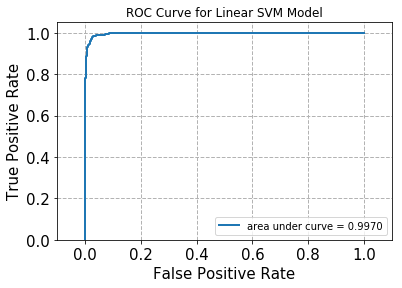

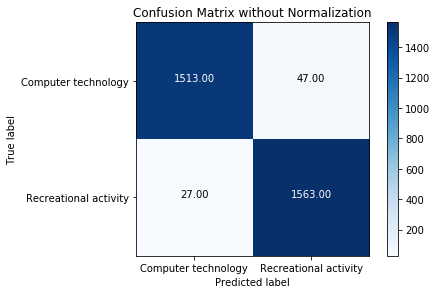

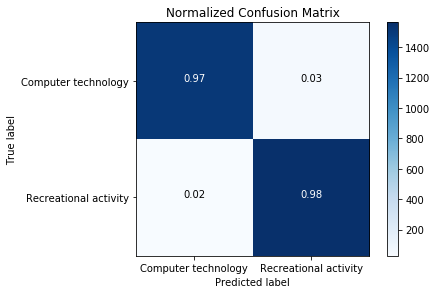

Accuracy: 0.976507936508
Recall: 0.983018867925
Precision: 0.970807453416
F1_score: 0.976875 


------------------------------
RESULTS WHEN LSI & min_df = 5
------------------------------
Best Regulation Parameter: 100
Confusion Matrix without Normalization
[[1511   49]
 [  27 1563]]
Normalized Confusion Matrix
[[ 0.97  0.03]
 [ 0.02  0.98]]


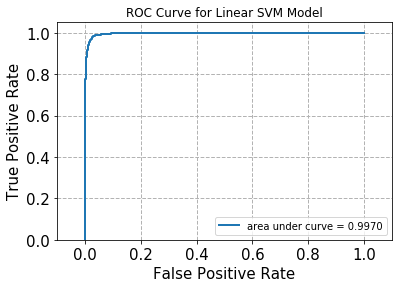

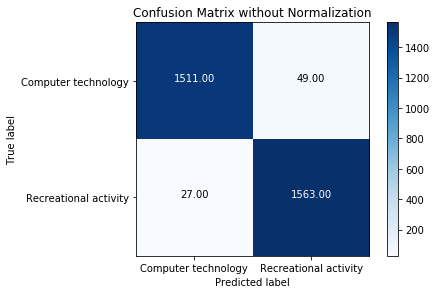

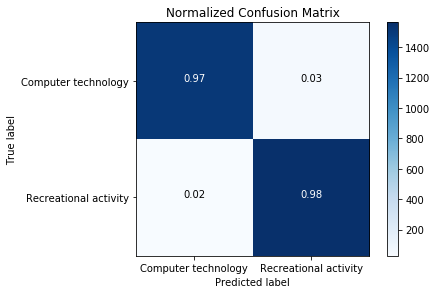

Accuracy: 0.975873015873
Recall: 0.983018867925
Precision: 0.969602977667
F1_score: 0.976264834478 


------------------------------
RESULTS WHEN NMF & min_df = 2
------------------------------
Best Regulation Parameter: 10000
Confusion Matrix without Normalization
[[1496   64]
 [  46 1544]]
Normalized Confusion Matrix
[[ 0.96  0.04]
 [ 0.03  0.97]]


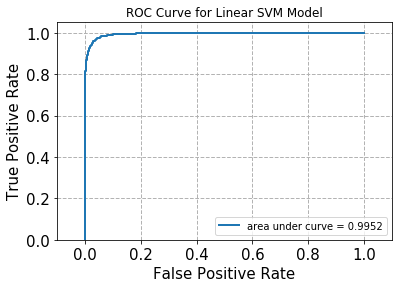

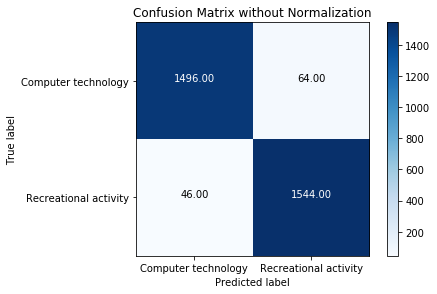

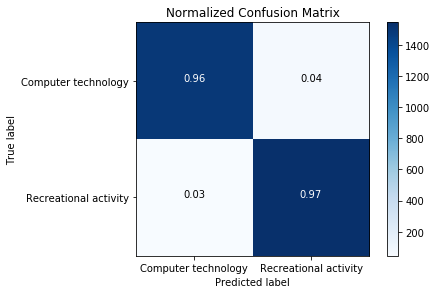

Accuracy: 0.965079365079
Recall: 0.97106918239
Precision: 0.960199004975
F1_score: 0.965603502189 




In [25]:
i = 0
for i in range(0,3):
    if i == 0:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = LSI
    elif i == 1:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 5')
        print('-'*30)
        MIN_DF = 5
        LSI_OR_NMF = LSI
    else:
        print('-'*30)
        print('RESULTS WHEN NMF & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = NMF
        
    accuracies = []
    for coef in coefficients:
        pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, LogisticRegression(C = coef))
        pipe.fit(all_train.data, train_classifier)
        test_score = pipe.decision_function(all_test.data)
        test_predict = pipe.predict(all_test.data)
        accuracy = accuracy_score(test_classifier, test_predict)
        accuracies.append(accuracy)
        
    best_regulation_parameter = coefficients[accuracies.index(max(accuracies))]
    print('Best Regulation Parameter:', best_regulation_parameter)
    
    pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, LogisticRegression(C = best_regulation_parameter))
    pipe.fit(all_train.data, train_classifier)
    
    test_score = pipe.decision_function(all_test.data)
    test_predict = pipe.predict(all_test.data)
    
    fpr, tpr, threshold = roc_curve(test_classifier, test_score)
    plot_roc(fpr, tpr)
    
    compute_and_plot_confusion_matrix(test_classifier, test_predict)
    
    accuracy = accuracy_score(test_classifier, test_predict)
    print('Accuracy:',accuracy)
    
    recall = recall_score(test_classifier, test_predict)
    print('Recall:',recall)
    
    precision = precision_score(test_classifier, test_predict)
    print('Precision:',precision)
    
    f1_score = 2/((1/recall)+(1/precision))
    print('F1_score:',f1_score,'\n\n')
    
    i = i+1
    

## Problem (j) 

In [26]:
categories_names = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']

train_data = fetch_20newsgroups(subset = 'train', categories = categories_names, shuffle = True, random_state = 42)
test_data = fetch_20newsgroups(subset = 'test', categories = categories_names, shuffle = True, random_state = 42)


In [27]:
class_show = ['pc', 'mac', 'misc', 'religion']

def plot_confusion_matrix_4(test_label, test_predicted):
    cnf_matrix = confusion_matrix(test_label, test_predicted)
    np.set_printoptions(precision = 2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes = class_show, title = 'Confusion Matrix without Normalization')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes = class_show, normalize = True, title = 'Normalized Confusion Matrix')
    plt.show()

### Naive Bayes classification 

Confusion Matrix without Normalization
[[339  36  17   0]
 [ 31 337  17   0]
 [ 40  22 327   1]
 [  4   1   4 389]]
Normalized Confusion Matrix
[[ 0.86  0.09  0.04  0.  ]
 [ 0.08  0.88  0.04  0.  ]
 [ 0.1   0.06  0.84  0.  ]
 [ 0.01  0.    0.01  0.98]]


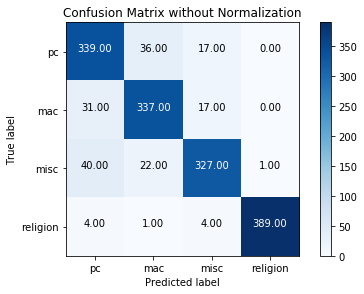

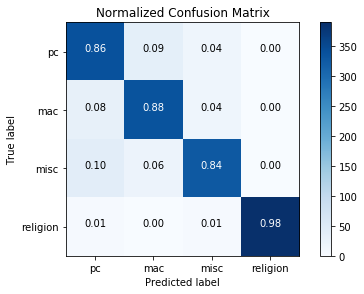

Accuracy: 0.88945686901
Recall: 0.88945686901
Precision: 0.891374532645
F1_score: 0.890414668322


In [28]:
pipe = Pipeline([('vect', CountVectorizer(analyzer = 'word', tokenizer = stem_tokenizer, stop_words = stop_words, min_df = 5)),
                 ('tfidf', TfidfTransformer()),
                 ('clf', MultinomialNB())])

pipe.fit(train_data.data, train_data.target)

test_predict = pipe.predict(test_data.data)

plot_confusion_matrix_4(test_data.target, test_predict)

accuracy = accuracy_score(test_data.target, test_predict)
print('Accuracy:',accuracy)

recall = recall_score(test_data.target, test_predict, average = 'weighted')
print('Recall:',recall)

precision = precision_score(test_data.target, test_predict, average = 'weighted')
print('Precision:',precision)

f1_score = 2/((1/recall)+(1/precision))
print('F1_score:',f1_score)


Confusion Matrix without Normalization
[[286  38  63   5]
 [114 209  57   5]
 [ 59  36 266  29]
 [  2   2   2 392]]
Normalized Confusion Matrix
[[ 0.73  0.1   0.16  0.01]
 [ 0.3   0.54  0.15  0.01]
 [ 0.15  0.09  0.68  0.07]
 [ 0.01  0.01  0.01  0.98]]


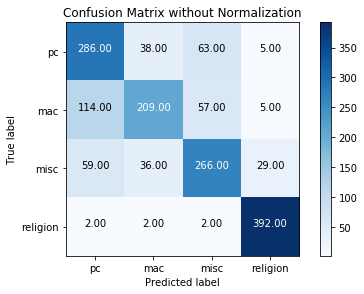

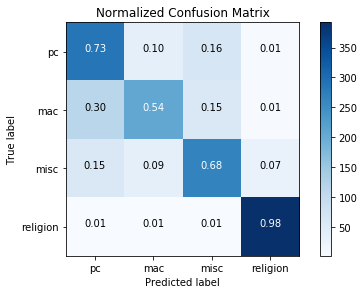

Accuracy: 0.736741214058
Recall: 0.736741214058
Precision: 0.737944795405
F1_score: 0.737342513573


In [29]:
pipe = Pipeline([('vect', CountVectorizer(analyzer = 'word', tokenizer = stem_tokenizer, stop_words = stop_words, min_df = 2)),
                 ('tfidf', TfidfTransformer()),
                 ('reduce_dim', NMF(n_components = 50, init = 'random', random_state = 0)),
                 ('clf', GaussianNB())])

pipe.fit(train_data.data, train_data.target)

test_predict = pipe.predict(test_data.data)

plot_confusion_matrix_4(test_data.target, test_predict)

accuracy = accuracy_score(test_data.target, test_predict)
print('Accuracy:',accuracy)

recall = recall_score(test_data.target, test_predict, average = 'weighted')
print('Recall:',recall)

precision = precision_score(test_data.target, test_predict, average = 'weighted')
print('Precision:',precision)

f1_score = 2/((1/recall)+(1/precision))
print('F1_score:',f1_score)


### Multiclass SVM Classification (One VS One) 

------------------------------
RESULTS WHEN LSI & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[329  44  19   0]
 [ 40 320  24   1]
 [ 27  17 345   1]
 [  5   2   3 388]]
Normalized Confusion Matrix
[[ 0.84  0.11  0.05  0.  ]
 [ 0.1   0.83  0.06  0.  ]
 [ 0.07  0.04  0.88  0.  ]
 [ 0.01  0.01  0.01  0.97]]


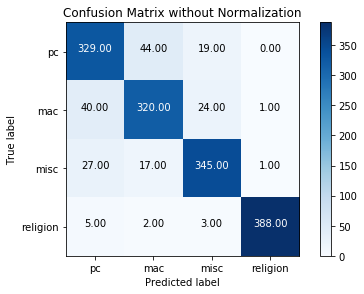

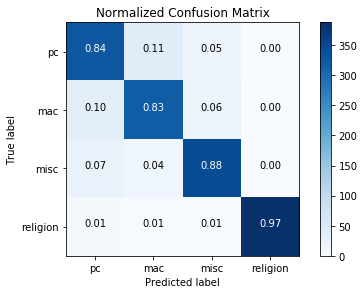

Accuracy: 0.883067092652
Recall: 0.883067092652
Precision: 0.883938402424
F1_score: 0.883502532717 


------------------------------
RESULTS WHEN NMF & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[301  73  18   0]
 [ 73 288  24   0]
 [ 45  20 325   0]
 [ 10  15   9 364]]
Normalized Confusion Matrix
[[ 0.77  0.19  0.05  0.  ]
 [ 0.19  0.75  0.06  0.  ]
 [ 0.12  0.05  0.83  0.  ]
 [ 0.03  0.04  0.02  0.91]]


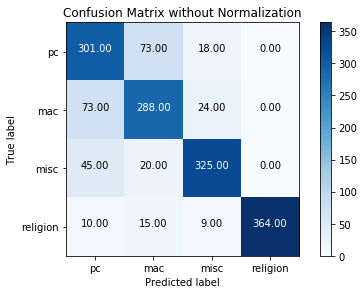

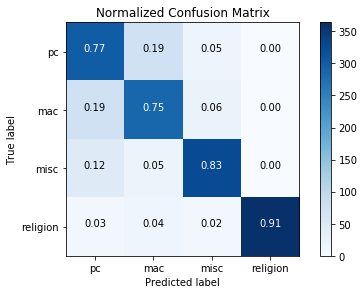

Accuracy: 0.81661341853
Recall: 0.81661341853
Precision: 0.824371048479
F1_score: 0.8204738967 




In [33]:
i = 0
for i in range(0,2):
    if i == 0:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = LSI
    else:
        print('-'*30)
        print('RESULTS WHEN NMF & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = NMF
    pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, OneVsOneClassifier(LinearSVC()))
    pipe.fit(train_data.data, train_data.target)
    
    test_predict = pipe.predict(test_data.data)
                            
    plot_confusion_matrix_4(test_data.target, test_predict)
                            
    accuracy = accuracy_score(test_data.target, test_predict)
    print('Accuracy:',accuracy)
                            
    recall = recall_score(test_data.target, test_predict, average = 'weighted')
    print('Recall:',recall)
                            
    precision = precision_score(test_data.target, test_predict, average = 'weighted')
    print('Precision:',precision)
                            
    f1_score = 2/((1/recall)+(1/precision))
    print('F1_score:',f1_score,'\n\n')
    i = i+1
    

### Multiclass SVM Classification (One VS Rest)

------------------------------
RESULTS WHEN LSI & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[317  52  21   2]
 [ 34 322  27   2]
 [ 24  15 350   1]
 [  3   2   2 391]]
Normalized Confusion Matrix
[[ 0.81  0.13  0.05  0.01]
 [ 0.09  0.84  0.07  0.01]
 [ 0.06  0.04  0.9   0.  ]
 [ 0.01  0.01  0.01  0.98]]


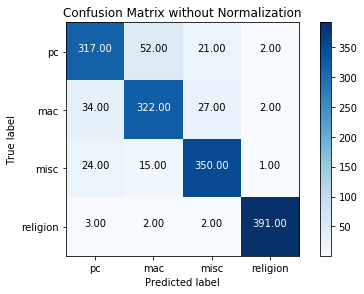

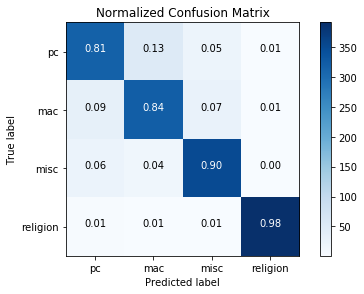

Accuracy: 0.88178913738
Recall: 0.88178913738
Precision: 0.881804672041
F1_score: 0.881796904642 


------------------------------
RESULTS WHEN NMF & min_df = 2
------------------------------
Confusion Matrix without Normalization
[[292  69  30   1]
 [ 66 285  32   2]
 [ 34  15 337   4]
 [  1   3   8 386]]
Normalized Confusion Matrix
[[ 0.74  0.18  0.08  0.  ]
 [ 0.17  0.74  0.08  0.01]
 [ 0.09  0.04  0.86  0.01]
 [ 0.    0.01  0.02  0.97]]


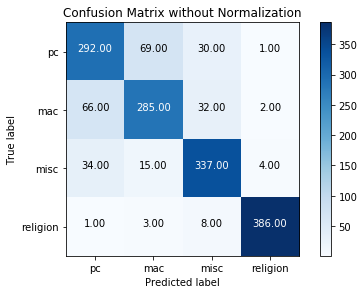

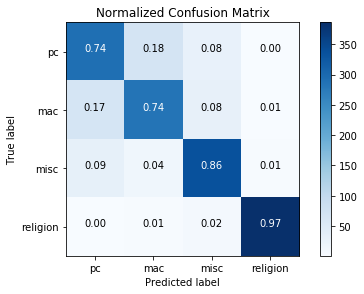

Accuracy: 0.830670926518
Recall: 0.830670926518
Precision: 0.830703801453
F1_score: 0.83068736366 




In [32]:
i = 0
for i in range(0,2):
    if i == 0:
        print('-'*30)
        print('RESULTS WHEN LSI & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = LSI
    else:
        print('-'*30)
        print('RESULTS WHEN NMF & min_df = 2')
        print('-'*30)
        MIN_DF = 2
        LSI_OR_NMF = NMF
    pipe = produce_pipeline(MIN_DF, LSI_OR_NMF, OneVsRestClassifier(LinearSVC()))
    pipe.fit(train_data.data, train_data.target)
    
    test_predict = pipe.predict(test_data.data)
                            
    plot_confusion_matrix_4(test_data.target, test_predict)
                            
    accuracy = accuracy_score(test_data.target, test_predict)
    print('Accuracy:',accuracy)
                            
    recall = recall_score(test_data.target, test_predict, average = 'weighted')
    print('Recall:',recall)
                            
    precision = precision_score(test_data.target, test_predict, average = 'weighted')
    print('Precision:',precision)
                            
    f1_score = 2/((1/recall)+(1/precision))
    print('F1_score:',f1_score,'\n\n')
    i = i+1
    